<a href="https://colab.research.google.com/github/LucioFassarella/SimulacoesComputacionaisQuanticas/blob/main/Qiskit_SimulacaoSpin1d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qiskit

---

<font color = "yellow">**Qiskit**:</font>
*   [Python's Instalation](https://pypi.org/project/qiskit/)
*   [IBM Quantum cloud](https://quantum.cloud.ibm.com/)
    *   [Qiskit connect](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started) (IBM Runtime Service)
       *   [Getting Started](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started)
*   [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
    *   [Qiskit Circuit Library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
    *   [Qiskit Gates Tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)
    *   [List of Quantum Logic Gates](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates)

[<font color="yellow">**Execution modes**</font>](https://quantum.cloud.ibm.com/docs/en/guides/execution-modes)
*	[Choose the execution mode](https://quantum.cloud.ibm.com/docs/en/guides/choose-execution-mode)
*   [Single Job](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples#estimator-examples)
*	[Batch mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-batch)
*	[Section mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-session)
*	[Primitives examples](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples)


[<font color="yellow">**Local simulators**</font>](https://quantum.cloud.ibm.com/docs/en/migration-guides/local-simulators)

---

⏬

## <font color = "orange">Introdução à Computação Quântica</font>







## QISKIT: Carregamento

In [3]:
!pip install qiskit -U
!pip install qiskit_aer -U
!pip install qiskit-ibm-runtime -U

!pip install matplotlib
!pip install pylatexenc

import qiskit
qiskit.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4ff9a666bad87bfb5ec0b1ba56f653a5843453caf668b9a72b5823749c9c1e8d
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178

'2.2.3'

In [4]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

## Método de Primitivos



In [7]:
def qiskit_sampler(circuito_com_medidas, shots = None, backend = None):
    '''
    Método para executar o Sampler
    >>> O Sampler realiza medidas em circuitos quânticos e retorna a contagem de qubits.
        A partir dos resultados do Sampler, podemos estimar as probabilidade de cada resultado.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        backend  : backend para rodar o Sampler

    Saída:
        resultado do Sampler

    Observação: os resultados do Sampler são rotulados pelo nomes dos registros clássicos.
                Para um circuito com medidas definidas por 'measure_all', o rótulo é 'meas'.
                Para circuitos com medidas definidas de início sem denominação explícita,
                os rótulos são 'c', 'c1', 'c2', etc.

    Tutorial do Sampler: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/sampler-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import SamplerV2 as Sampler

    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    from qiskit.transpiler import generate_preset_pass_manager
    pm = generate_preset_pass_manager(optimization_level=2, backend = backend)

    # Transpilação

    isa_circuitos = pm.run(circuito_com_medidas)

    if shots is None:
        shots = 2**10
    else:
        shots = shots

    sampler = Sampler(backend)
    job = sampler.run([(isa_circuitos, )], shots = shots)
    result = job.result()
    counts = result[0].data['c'].get_counts()

    return counts, result

def qiskit_estimator(circuito_sem_medidas, hamiltoniano, precisao = None, backend = None):
    '''
    Método para executar o Estimator
    >>> O Estimator estima valores esperados de circuitos e observáveis.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        hamiltoniano (SparsePauliOp): hamiltoniano a ser medido
        precisao (float): precisão do resultado
        backend  : backend para rodar o Estimator

    Saída:
        resultado do Estimator

    Tutorial do EstimatorV2: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/estimator-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import EstimatorV2 as Estimator
    from qiskit.transpiler import generate_preset_pass_manager

    # Use the existing service object
    # service = QiskitRuntimeService()
    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    if precisao is None:
        precisao = 2**(-10)
    else:
        precisao = precisao

    # Transpilação

    pm = generate_preset_pass_manager(backend = backend, optimization_level=1)
    isa_circuito = pm.run(circuito_sem_medidas)
    isa_hamiltoniano = hamiltoniano.apply_layout(isa_circuito.layout)

    # Estimator:

    estimator = Estimator(mode=backend)

    # Job

    job = estimator.run([(isa_circuito, isa_hamiltoniano, )], precision = precisao)

    pub_result = job.result()[0]

    return pub_result.data.evs

# Simulação de Spin-1/2

*   Fonte: Émerson M. Alves *et al.*: *Simulating single-spin dynamics on an IBM five-qubit chip*. Rev. Bras. Ensino Fís., v.42 (2020). [DOI:10.1590/1806-9126-RBEF-2019-0299](https://www.scielo.br/j/rbef/a/B7wZXnYHXcWPGfPy8SjZs6w/?lang=en).

**Equação de Schrödinger**

$$
i\hbar \frac{\partial}{\partial t} |\psi(t)\rangle = H(t)|\psi(t)\rangle .
$$

**Hamiltoniano** proveniente de campo magnético:

$$
H(t) = \frac{\hbar \omega_0}{2} \sigma_z + \frac{\hbar \omega_r}{2} \left\lbrack \cos(\omega t)\sigma_x + \sin(\omega t)\sigma_y \right\rbrack.
$$
<font color="gray"> **Dedução do Hamiltoniano** devido à interação do spin-1/2 com campo magnético externo.

Operador momento magnético do spin-1/2:
$$
\begin{split}
\vec{\mu} &= \frac{\gamma \hbar}{2} \vec{\sigma};\ \ \vec{\sigma} = \sigma_x \hat{x} + \sigma_y \hat{y} + \sigma_z\ \hat{z};\\
\gamma &: \text{fator giromagnético (característico da partículas carregadas)}.
\end{split}
$$
Campo magnético externo:
$$
\begin{split}
\vec{B} &= B_0 \hat{z} + B_r\left\lbrack \cos(\omega t)\hat{x} + \sin(\omega t)\hat{y}\right\rbrack;\\
B_0 &: \text{intensidade do campo magnético vertical};\\
B_r &: \text{intensidade do campo magnético transversal}\\
\omega &: \text{frequência de rotação do campo magnético transversal}.
\end{split}
$$
Hamiltoniano:
$$
\begin{split}
H(t) &= - \vec{\mu} \cdot \vec{B}(t)\\
&= \frac{\hbar \omega_0}{2} \sigma_z + \frac{\hbar \omega_r}{2} \left\lbrack \cos(\omega t)\sigma_x + \sin(\omega t)\sigma_y \right\rbrack,
\end{split}
$$
onde
Aqui,  , enquanto $\omega_0$ e $\omega_r$ são frequências característica da iteração campo-partícula:
$$
\begin{split}
\omega_0 &= - \frac{\gamma B_0}{\hbar}\ \ \text{(frequência de Larmor)};\\
\omega_r &= - \frac{\gamma B_r}{\hbar}\ \ \text{(acoplamento spin-campo transversal)}.
\end{split}
$$
</font>
⏬
## Evolução do vetor-estado: solução exata
$$
| \psi(t)\rangle = e^{-i\frac{\omega}{2}t \sigma_z}e^{-i\frac{\tilde{H}}{\hbar}t} | \psi(0)\rangle,
$$
onde
$$
\tilde{H} = \hbar \frac{\omega_0 - \omega}{2}\sigma_z + \hbar \frac{\omega_r}{2}\sigma_x.
$$
**Operador-evolução**:
$$
\begin{split}
U_0(t) &= e^{-i\frac{\omega}{2}t \sigma_z} = e^{-\frac{i\omega t}{2}}%
\begin{pmatrix}
1 & 0\\
0 & e^{i\omega t}
\end{pmatrix}\\
\ \\
U_{xz}(t) &= e^{-i\frac{\tilde{H}}{\hbar}t} = %
\begin{pmatrix}
\cos(\Omega t/2) + i \frac{\Delta}{\Omega} \sin(\Omega t/2) & i\frac{\omega_r}{\Omega}\sin(\Omega t/2)\\
 i\frac{\omega_r}{\Omega}\sin(\Omega t/2) & \cos(\Omega t/2) - i \frac{\Delta}{\Omega} \sin(\Omega t/2)
\end{pmatrix}
\end{split}
$$
e
$$
\Delta = \omega_0 - \omega;\ \ \Omega = \sqrt{\Delta^2 + \omega_r^2}.
$$

## Evolução do vetor-estado por trotterização

Hamiltoniano:
$$
H(t) = \frac{\hbar \omega_0}{2} \sigma_z + \frac{\hbar \omega_r}{2} \left\lbrack \cos(\omega t)\sigma_x + \sin(\omega t)\sigma_y \right\rbrack.
$$
Definindo
$$
a(t) := \frac{\omega_r }{2}\cos(\omega t);\ b(t) :=  \frac{\omega_r }{2}\sin(\omega t);\ c(t) := \frac{\omega_0}{2},
$$
escrevemos:
$$
H(t)/\hbar = a(t)\sigma_x + b(t)\sigma_y + c(t)\sigma_z.
$$

Podemos escrever aproximações para o operador-evolução em cada sub-intervalo de uma partição pontilhada do intervalo $[t_0,t_f]$:
$$
  t_0 < t< t < \dots <t_n = t_f ;
$$
$$
t^*_k \in [t_{k-1},t_k],\ $\Delta t_k := t_k - t_{k-1};\ \forall k = 1, \dots, n.
$$
Usamos uma aproximação de Trotter para o operador-evolução em cada sub-intervalo da partição:

$$
\begin{split}
U(t_k,t_{k-1}) &\approx e^{-i H(t_k^*)\Delta t_k/\hbar}\\
&\approx  e^{-ia(t_k^*)X \Delta t_k/2}e^{-ib(t_k^*)Y \Delta t_k/2}e^{-ic(t_k^*)Z \Delta t_k}e^{-ib(t_k^*)Y \Delta t_k/2}e^{-ia(t_k^*)X \Delta t_k/2}\\
& = R_X(a(t_k^*) \Delta t_k)R_Y(b(t_k^*)\Delta t_k)R_Z(2c(t_k^*)\Delta t_k/)R_Y(b(t_k^*) \Delta t_k)R_X(a(t_k^*) \Delta t_k).
\end{split}
$$

Assim, temos uma expressão para a solução do vetor-estado no instante $t_f$:
$$
\begin{split}
|\psi(t_f)\rangle %&\approx \prod_{k=1}^{n}e^{-ia(t_k^*)X \Delta t_k/2}e^{-ib(t_k^*)Y \Delta t_k/2}e^{-ic(t_k^*)Z \Delta t_k}e^{-ib(t_k^*)Y \Delta t_k/2\hbar}e^{-ia(t_k^*)X \Delta t_k/2} \ket{\psi(t_0)}\\
& \approx \prod_{k=1}^{n}R_X(a(t_k^*) \Delta t_k)R_Y(b(t_k^*)\Delta t_k)R_Z(2c(t_k^*)\Delta t_k)R_Y(b(t_k^*) \Delta t_k)R_X(a(t_k^*) \Delta t_k) |\psi(t_0)\rangle.
\end{split}
$$

Para simulação Q-computacional, precisamos:

*   Preparar o estado $|\psi(t_0)\rangle$;
*   Implementar os operadores unitários $R_X(a(t_k^*) \Delta t_k)$, $R_Y(b(t_k^*)\Delta t_k)$ e $R_Z(2c(t_k^*)\Delta t_k)$.


## **Fenômeno de Ressonância**: situação em que a frequência do campo transversal igual à frequência de Larmor


Condição de frequência do campo transversal é igual à frequência de Larmor:

$$
\omega = \omega_0 \leadsto \Delta = 0\ \ \&\ \ \Omega = |\omega_f|.
$$
Nessa situação:
$$
\begin{split}
U_0(t) &=%  
\begin{pmatrix}
1 & 0\\
0 & e^{i\omega t}
\end{pmatrix}%
\ \ \ (\text{descartando a fase global});\\
\ \\
U_f^{res}(t) &= %
\begin{pmatrix}
\cos(\omega_r t/2)  & i\sin(\omega_r t/2)\\
 i\sin(\omega_r t/2) & \cos(\omega_r t/2)
\end{pmatrix};
\end{split}
$$
e
$$
|\psi(t)\rangle = U_0(t)U_{xz}^{res}(t)|\psi(0)\rangle.
$$

Para a simulação Q-computacional, exprimimos cada parte do operador evolução em termos de portas quânticas de 1-qubit:
$$
\begin{split}
U_0(t) &= P(\omega t);\\%
U_f^\textrm{eff}(t) &= U3\left(\omega_f t,\frac{\pi}{2},-\frac{\pi}{2}\right),
\end{split}
$$
sendo
$$
\begin{split}
P(\theta) &= \begin{bmatrix}
	1 & 0\\
	0 &e^{i\theta}
\end{bmatrix}\ \ \ \ \ \text{(operador de fase)};\\%
U3(\theta,\phi, \lambda) &= \begin{bmatrix}
	\cos(\theta/2) & -e^{i\lambda} \sin(\theta/2)\\
	e^{i\phi}\sin(\theta/2) & e^{i(\phi + \lambda)}\cos(\theta/2)
\end{bmatrix}\ \ \ \ \ \text{(operador unitári geral)}.
\end{split}
$$
Portanto,
$$
|\psi(t)\rangle = P(\omega t)U3\left(\omega_f t,\frac{\pi}{2},-\frac{\pi}{2}\right)|\psi(0)\rangle.
$$
Para a condição inicial
$$
|\psi(0)\rangle = |0\rangle,
$$
temos:
$$
|\psi(t)\rangle = P(\omega t)U3\left(\omega_f t,\frac{\pi}{2},-\frac{\pi}{2}\right)|\psi(0)\rangle.
$$
A magnetização na direção-z é dada por
$$
\mathcal{M}_Z = \frac{\hbar}{2}\sigma_z.
$$
Portanto, o valor esperao da magnetização
$$
\langle \mathcal{M}_z(t) \rangle = \frac{\hbar}{2}\langle \psi(t) | \sigma_z |\psi(t) \rangle= \frac{\hbar}{2}\cos(\omega t).
$$

---

*	Qiskit: <i>How do I use parameterized circuits in Qiskit? 1 Minute Qiskit</i>. Youtube, 17 ago. 2020. URL: [https://youtu.be/adeYx7bwYrA?si=rgT9Gnmk_6k7G1ty](https://youtu.be/adeYx7bwYrA?si=rgT9Gnmk_6k7G1ty).

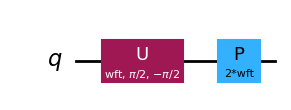

Hamiltoniano_x2: Z


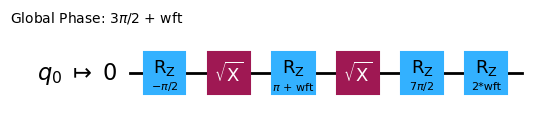

In [36]:
# Parâmetros do Hamiltoniano:

w = 2
w0 = 1
wf = 1

'''
Simulação da evolução exata
'''


from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler import generate_preset_pass_manager

from qiskit.circuit import Parameter
import numpy as np

# Backend
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane()

# Construção do circuito parametrizado por  wt e wft

wt = Parameter("wt")
wft = Parameter("wft")

ratio = 2 # razão w/wf

qc = QuantumCircuit(1)
qc.u(wft, np.pi/2, -np.pi/2, 0)
qc.p(ratio*wft, 0)

display(qc.draw('mpl'))

# Hamiltoniano

from qiskit.quantum_info import Pauli, SparsePauliOp

sigmaz = Pauli("Z")
print(f"Hamiltoniano_x2: {sigmaz}")

# Transpilação

pm = generate_preset_pass_manager(backend = backend, optimization_level=1)
qc_transpilado = pm.run(qc)
hamiltoniano_x2_transpilado = sigmaz.apply_layout(qc_transpilado.layout)

display(qc_transpilado.draw('mpl'))

'''
Magnetização simulada exatamente
'''

# Estimator:
estimator = Estimator(mode=backend)
precisao = 2**(-10)

# Definição da função que calcula o valor esperado da magnetização

def magnetizacao(wft_ = float, precisao = None):
    '''
    Função que calcula o valor esperado da magnetização

    Input:
        wft (float)...: frequência de rotação do campo magnético transversal
    Output:
        magnetizacao (float): valor esperado da magnetização
    '''

    if precisao is None:
        precisao = 2**(-10)
    else:
        precisao = precisao

    # Circuito com parâmetro numérico

    qc_transpilado_numerico = qc_transpilado.assign_parameters({wft: wft_})

    # Job
    job = estimator.run([(qc_transpilado_numerico, hamiltoniano_x2_transpilado, )], precision = precisao)
    pub_result = job.result()[0]

    return pub_result.data.evs

magnetizacao_simulada_exata = [magnetizacao(wf*tempo[k], 2**(-10)) for k in range(num_fatores + 1)]

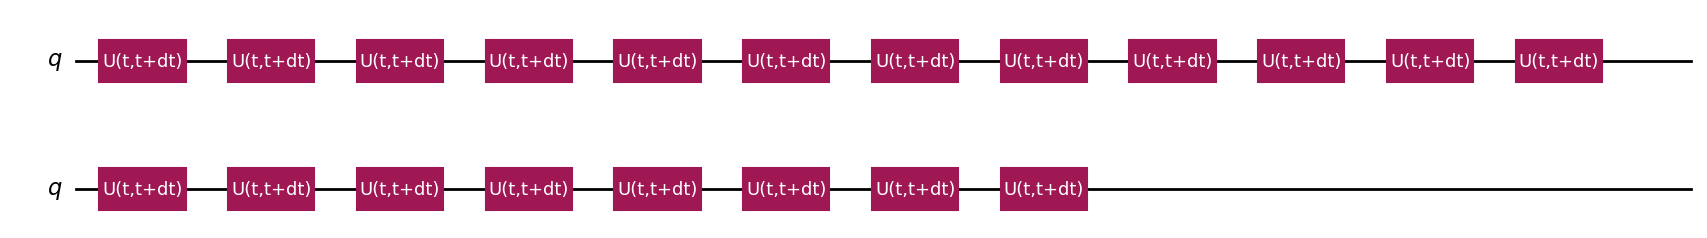

In [31]:
'''
Evolução Trotterizada do Vetor-estado
'''

# Funções-coeficientes do Hamiltoniano:
import numpy  as np

def a(t = float):
    '''
    Coeficiente de X no Hamiltoniano
    '''

    return wf*np.cos(w*t)/2

def b(t = float):
    '''
    Coeficiente de Y no Hamiltoniano
    '''

    return wf*np.sin(w*t)/2

def c(t = float):
    '''
    Coeficiente de Z no Hamiltoniano
    '''

    return w0/2

# Operador-evolução trotterizado num intervalo [t_{k-1},t_k] com t_{k-1} < tstar < t_k e dt = t_k - t_{k-1}

def U_trotter(tstar = float, dt = float):
    '''
    Função que cria o circuito que implementa o operador-evolução trotterizado
    num intervalo [t_{k-1},t_k]

    Entradas:
        tstar (float): instante de tempo no meio do intervalo [t_{k-1},t_k]
        dt (float): passo do intervalo [t_{k-1},t_k]
        omega, omega0, omegar (float): parâmetros do Hamiltoniano

    Saída:
        circuito quântico que implementa o operador-evolução
    '''

    qc = QuantumCircuit(1, name = "U(t,t+dt)")
    qc.rx(a(tstar)*dt, 0)
    qc.ry(b(tstar)*dt, 0)
    qc.rz(2*c(tstar)*dt, 0)
    qc.ry(b(tstar)*dt,0)
    qc.rx(a(tstar)*dt,0)

    return qc

# Evolução Trotterizada

def operador_evolucao(t0 = float, tf = float, num_fatores = int):
    '''
    Função que cria o circuito que implementa o operador-evolução trotterizado
    num intervalo [t0, tf] com num_fatores fatores.
    '''

    dt = float((tf - t0)/num_fatores)

    qc = QuantumCircuit(1, name = "Evolução Trotterizada")

    for k in range(num_fatores):
        tstar = t0 + (k + 0.5)*dt
        qc.append(U_trotter(tstar,dt),[0])

    return qc

circuito = operador_evolucao(0, 2*np.pi, 20)
display(circuito.draw('mpl'))

In [15]:
# Evolução Trotterizada da Magnetização

import time

inicio = time.time()

# Intervalo de evolução
t0 = 0.0
tf = 2*np.pi
duracao = tf - t0

# Fracionamento do período e partição de [t_0, t_f]
num_fatores = 20
dt = float(duracao/num_fatores)
tempo = [t0 + k*dt for k in range(num_fatores + 1)]
tempo_star = [t0 + (k + 0.5)*dt for k in range(num_fatores)]

# Circuito
spin = QuantumCircuit(1)

# Preparação do estado inicial
spin.id(0) # <-- iniciação no estado |0>

# Magnetização trotterizada M_z/\hbar(t)
from qiskit.quantum_info import SparsePauliOp
Mz = SparsePauliOp(["Z"], [0.5])

magnetizacao_trotter = []

# Magnetização inicial t = t0
spin_instante = spin.copy()
magnetizacao_instante = qiskit_estimator(spin_instante, Mz, precisao = 2**(-10))
magnetizacao_trotter.append(magnetizacao_instante)

# Magnetização em t1, ... , tn
for k in range(num_fatores):
    spin.append(U_trotter(tempo_star[k], dt),[0])
    spin_instante = spin.copy()
    magnetizacao_instante = qiskit_estimator(spin_instante, Mz, precisao = 2**(-10))
    magnetizacao_trotter.append(magnetizacao_instante)

fim = time.time()

print(f"Instantes de tempo ({len(tempo)}): {tempo}")
print(f"Magnetização ({len(magnetizacao_trotter)}): {magnetizacao_trotter}")

print(f"Tempo de execução da simulação: {(fim - inicio)/60} minutos")

Instantes de tempo (21): [0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793, 3.4557519189487724, 3.7699111843077517, 4.084070449666731, 4.39822971502571, 4.71238898038469, 5.026548245743669, 5.340707511102648, 5.654866776461628, 5.969026041820607, 6.283185307179586]
Magnetização (21): [array(0.47459412), array(0.45148277), array(0.38607311), array(0.28486347), array(0.15541935), array(0.01210785), array(-0.13253403), array(-0.26403141), array(-0.36974907), array(-0.44010448), array(-0.46831322), array(-0.45140076), array(-0.39140129), array(-0.29434967), array(-0.16837406), array(-0.02571487), array(0.11898041), array(0.25246525), array(0.36304379), array(0.43860149), array(0.4724617)]
Tempo de execução da simulação: 2.352311170101166 minutos


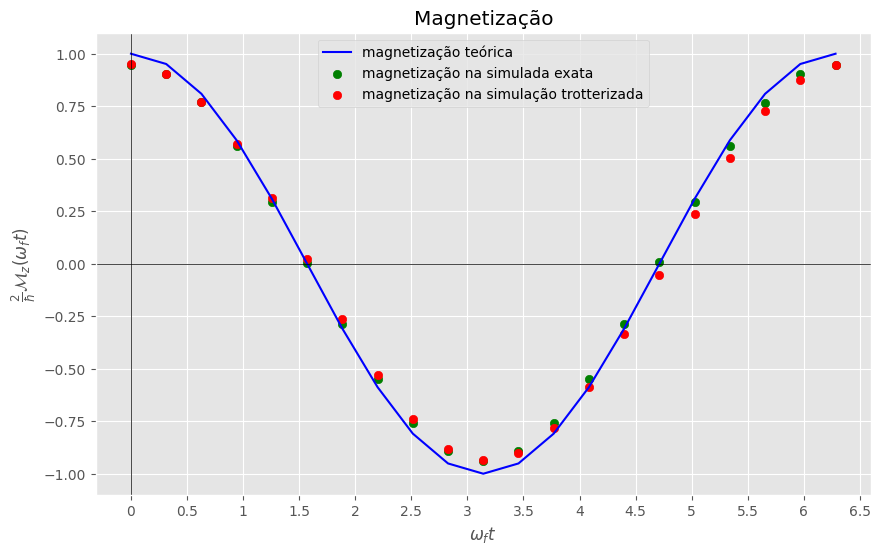

In [39]:
# Plotagem de 2M_z(t)/\hbar

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

# Magnetização teórica
def magnetizacao_teorica(wft):
    return np.cos(wft)/2

magnetizacao_teorica = [2*magnetizacao_teorica(wf*tempo[k]) for k in range(num_fatores + 1)]

#magnetizacao_simulada_exata = [magnetizacao(wf*tempo[k], 2**(-10)) for k in range(num_fatores + 1)]

magnetizacao_simulada = [2*magnetizacao_trotter[k] for k in range(num_fatores + 1)]

# Create the plot
#plt.figure(figsize=(10, 6))

f,ax = plt.subplots(figsize = (10,6))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.style.use("ggplot")


ax.plot(tempo, magnetizacao_teorica, label='magnetização teórica', color = 'blue')
ax.scatter(tempo, magnetizacao_simulada_exata, label='magnetização na simulada exata', color = 'green')
ax.scatter(tempo, magnetizacao_simulada, label='magnetização na simulação trotterizada', color = 'red')
plt.title('Magnetização')
plt.xlabel(r'$\omega_f t$')
plt.ylabel(r'$\frac{2}{\hbar} \mathcal{M}_z(\omega_f t)$')
ax.grid(True)
ax.legend()
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

plt.show()